In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Define the path to your ZIP file and the extraction location
zip_path = '/content/drive/MyDrive/Hackpack-Snuhacks/ElectroCom61.zip'  # Update with your actual path
extract_folder = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip'      # Path where data will be extracted

# Create the extraction folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dataset extracted to {extract_folder}")

KeyboardInterrupt: 

In [5]:
# Count images and labels in the respective folders
import os
extract_folder = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/valid'
images_folder = os.path.join(extract_folder, 'images')
labels_folder = os.path.join(extract_folder, 'labels')

# Counting images and labels
images = [f for f in os.listdir(images_folder) if f.endswith(('.jpg'))]
labels = [f for f in os.listdir(labels_folder) if f.endswith('.txt')]

print(f"Total number of images: {len(images)}")
print(f"Total number of label files: {len(labels)}")

Total number of images: 412
Total number of label files: 412


In [4]:
import os

train_images_path = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/test'
train_labels_path = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/train'

# List the image and label files
train_images = os.listdir(train_images_path)
train_labels = os.listdir(train_labels_path)

# Check for images without labels (for both .jpg and .jpeg)
missing_labels = []
for image in train_images:
    if image.endswith(('.jpg', '.jpeg')):
        label_file = image.rsplit('.', 1)[0] + '.txt'  # Replace extension with .txt
        if label_file not in train_labels:
            missing_labels.append(image)

print(f'Missing labels for images: {missing_labels}')

Missing labels for images: []


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Step 2: Import the necessary libraries
import os
from google.colab import drive
from ultralytics import YOLO


# Step 4: Define paths
train_images_path = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/train'
val_images_path = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/valid'
data_yaml_path = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/data.yaml'

# Check if paths exist
if not os.path.exists(train_images_path):
    raise FileNotFoundError(f"Train images path not found: {train_images_path}")
if not os.path.exists(val_images_path):
    raise FileNotFoundError(f"Validation images path not found: {val_images_path}")
if not os.path.exists(data_yaml_path):
    raise FileNotFoundError(f"data.yaml file not found: {data_yaml_path}")

# Step 5: Define and train the YOLOv8 model
# Load the YOLOv8 model (use a pretrained model for fine-tuning)
model = YOLO('yolov8n.pt')  # You can choose different model variants ('yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt')

# Train the model
model.train(
    data=data_yaml_path,  # Path to your dataset.yaml file
    epochs=40,  # Number of epochs for training
    batch=16,   # Batch size for training
    imgsz=640,  # Image size (adjust based on your GPU)
    project='/content/drive/MyDrive/Hackpack-Snuhacks/Model/runs/train',  # Directory to save training results
    name='yolov9_ElecComp',  # Name of the training session
    exist_ok=True  # Allow overwriting if there's a previous training run
)

# Step 6: Once training is done, the model weights will be saved under 'runs/train/yolov9_ElecComp/weights/'

In [2]:
!pip install
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model_path = '/content/drive/MyDrive/Hackpack-Snuhacks/Model/runs/train/yolov9_ElecComp/weights/best.pt'
model = YOLO(model_path)

# Path to the test image
test_image_path = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/test/images/IMG20240219113926_jpg.rf.9724c69342e44e72e934b2fc66f21012.jpg'
# Run inference
results = model.predict(source=test_image_path, show=True)

# Display the results
plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show

ModuleNotFoundError: No module named 'ultralytics'

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/test/images/testtt3.jpeg: 640x384 (no detections), 213.2ms
Speed: 3.4ms preprocess, 213.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


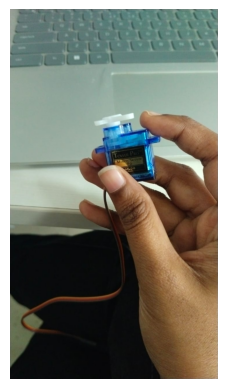

Detected Components: []


In [28]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model_path = '/content/drive/MyDrive/Hackpack-Snuhacks/Model/runs/train/yolov9_ElecComp/weights/best.pt'
model = YOLO(model_path)

# Path to the test image
test_image_path = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/test/images/testtt3.jpeg'
# Run inference
results = model.predict(source=test_image_path, show=True)

# Display the results
plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Extract detected object names
detected_objects = []
for result in results:
    for box in result.boxes:
        class_id = int(box.cls[0])  # Extract class ID
        class_name = model.names[class_id]  # Convert ID to class label
        detected_objects.append(class_name)

# Print detected objects
print("Detected Components:", detected_objects)


In [10]:
!pip install transformers accelerate torch einops


In [12]:
!pip install transformers accelerate torch

from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load Mistral-7B model
model_name = "TheBloke/Mistral-7B-Instruct-GGUF"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")

def chat(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    output = model.generate(**inputs, max_new_tokens=200)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# **Integrate YOLO output**
detected_components_prompt = f"I have detected the following electronic components: {components_string}. Suggest some innovative projects using these components."
response = chat(detected_components_prompt)

print("\nProject Suggestions:\n", response)


OSError: TheBloke/Mistral-7B-Instruct-GGUF is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [3]:
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 4.2 MB/s eta 0:00:00


In [18]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    temperature=0,
    groq_api_key="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",
    model="llama-3.3-70b-versatile"
)
response=llm.invoke("Name few sweets")
print(response)

content='Here are a few sweets:\n\n1. Chocolate\n2. Ice Cream\n3. Cupcake\n4. Brownies\n5. Cookies\n\nWould you like me to name more?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 38, 'total_tokens': 76, 'completion_time': 0.138181818, 'prompt_time': 0.004807001, 'queue_time': 0.23366510799999998, 'total_time': 0.142988819}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_5f849c5a0b', 'finish_reason': 'stop', 'logprobs': None} id='run-1a2869d5-79f7-4f0c-a1fc-dcbcb472a8e1-0' usage_metadata={'input_tokens': 38, 'output_tokens': 38, 'total_tokens': 76}



0: 640x640 1 Arduino-Uno, 1 ESP32, 1 Gas-Sensor, 2 LED-Lights, 1 OLED-Display, 246.2ms
Speed: 9.4ms preprocess, 246.2ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


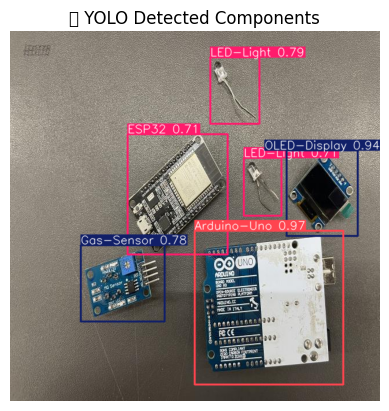


🔬 **Detected Components:** OLED-Display, LED-Light, Gas-Sensor, ESP32, Arduino-Uno

🚀 **AI-Powered Project Suggestions**
📌 What a great combination of components. Here are some innovative electronics projects you can build using OLED-Display, LED-Light, Gas-Sensor, ESP32, and Arduino-Uno:
📌 
📌 **1. Air Quality Monitoring System**
📌 Create a device that monitors and displays air quality using the Gas-Sensor. The OLED-Display shows the current air quality index, while the LED-Light changes color to indicate the level of pollution (e.g., green for good, yellow for moderate, red for poor). The ESP32 or Arduino-Uno can send the data to a cloud platform or a mobile app for further analysis.
📌 
📌 **2. Smart Home Automation System**
📌 Build a smart home automation system that integrates the ESP32 or Arduino-Uno with the OLED-Display and LED-Light. The system can control and monitor various home appliances, such as lights, fans, and thermostats. The Gas-Sensor can detect gas leaks, triggering 

In [5]:
# Install required packages
!pip install ultralytics langchain_groq opencv-python matplotlib numpy

from ultralytics import YOLO
from langchain_groq import ChatGroq
import cv2
import numpy as np
import matplotlib.pyplot as plt


model_path = "/content/drive/MyDrive/Hackpack-Snuhacks/Model/runs/train/yolov9_ElecComp/weights/best.pt"
model = YOLO(model_path)

llm = ChatGroq(
    temperature=0,
    groq_api_key="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",  # Replace with your actual API key
    model="llama-3.3-70b-versatile"
)

def detect_objects(image_path):
    """
    Runs YOLO model on the given image and returns detected objects.
    """
    image = cv2.imread(image_path)
    results = model.predict(source=image)

    detected_objects = set()
    for result in results:
        for box in result.boxes:
            class_id = int(box.cls[0])  # Extract class ID
            class_name = model.names[class_id]  # Convert ID to class label
            detected_objects.add(class_name)

    return list(detected_objects), results[0].plot()  # Return detected object names and annotated image

def generate_project_ideas(detected_objects):
    """
    Uses ChatGroq to generate project ideas based on detected electronic components.
    """
    if not detected_objects:
        return "⚠️ No components detected. Try again!"

    prompt = f"The detected components are {', '.join(detected_objects)}. Suggest innovative electronics projects using these components."
    response = llm.invoke(prompt)

    return response.content
test_image_path = "/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/test/images/IMG_5229_JPG.rf.716e8ad846e9bc2c9a2fc21266bf280e.jpg"
detected_objects, annotated_img = detect_objects(test_image_path)

# 🔎 Show detection results
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("📍 YOLO Detected Components")
plt.show()

# 📜 Print detected objects
if detected_objects:
    print("\n🔬 **Detected Components:**", ", ".join(detected_objects))
else:
    print("\nNo components detected.")

# 🚀 Generate AI-powered project ideas
project_ideas = generate_project_ideas(detected_objects)

print("\n" + "=" * 50)
print("AI-Powered Project Suggestions")
print("=" * 50)
print("📌 " + project_ideas.replace("\n", "\n📌 "))


In [2]:
!pip install ultralytics langchain_groq opencv-python matplotlib

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from langchain_groq import ChatGroq
from IPython.display import display, HTML, Javascript
import webbrowser


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/test/images/IMG20240219113926_jpg.rf.9724c69342e44e72e934b2fc66f21012.jpg: 640x640 2 Film-Capacitors, 3 Gas-Sensors, 3 LDR-Sensors, 5 MLC-Capacitors, 1 Sonar-Sensor, 538.0ms
Speed: 8.1ms preprocess, 538.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


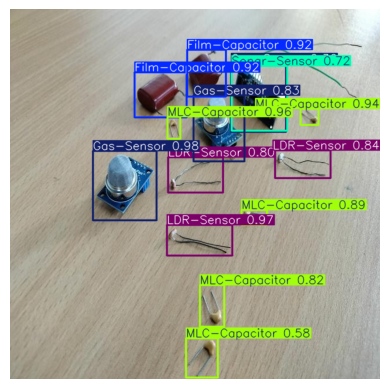


🔍 **Detected Components:**
Gas-Sensor, LDR-Sensor, MLC-Capacitor, MLC-Capacitor, Film-Capacitor, Film-Capacitor, MLC-Capacitor, LDR-Sensor, Gas-Sensor, MLC-Capacitor, LDR-Sensor, Sonar-Sensor, MLC-Capacitor, Gas-Sensor


In [7]:
# Initialize LLM (Replace with your API key)
llm = ChatGroq(
    temperature=0,
    groq_api_key="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",
    model="llama-3.3-70b-versatile"
)

# Load YOLO Model
model_path = '/content/drive/MyDrive/Hackpack-Snuhacks/Model/runs/train/yolov9_ElecComp/weights/best.pt'
model = YOLO(model_path)

# Path to the test image
test_image_path = '/content/drive/MyDrive/Hackpack-Snuhacks/ExtractElectroCom61.zip/ElectroCom61/test/images/IMG20240219113926_jpg.rf.9724c69342e44e72e934b2fc66f21012.jpg'

# Run object detection
results = model.predict(source=test_image_path, show=True)

# Display results
plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Extract detected object names
detected_objects = []
for result in results:
    for box in result.boxes:
        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        detected_objects.append(class_name)

print("\n🔍 **Detected Components:**")
print(", ".join(detected_objects))


In [8]:
# Generate project suggestions
prompt = f"The detected components are {', '.join(detected_objects)}. Suggest innovative project ideas using these components."
response = llm.invoke(prompt)

# Display project suggestions
print("\n🚀 **AI-Powered Project Suggestions**:")
print(response.content)



🚀 **AI-Powered Project Suggestions**:
What a fascinating combination of components! Here are some innovative project ideas that you can consider:

**Environmental Monitoring Systems**

1. **Air Quality Monitoring Station**: Use the Gas-Sensor and MLC-Capacitors to create a system that monitors and displays air quality levels in real-time. The LDR-Sensor can be used to adjust the system's sensitivity based on ambient light conditions.
2. **Smart Weather Station**: Combine the LDR-Sensor, MLC-Capacitors, and Film-Capacitors to create a weather station that monitors temperature, humidity, and light intensity. The Gas-Sensor can be used to detect changes in air quality due to weather conditions.

**Smart Home Automation**

1. **Automated Lighting System**: Use the LDR-Sensor and MLC-Capacitors to create a system that adjusts lighting levels based on ambient light conditions. The Film-Capacitors can be used to filter out noise and stabilize the system.
2. **Gas Leak Detection System**: Emp

In [9]:
# Function to show user options
def show_options():
    html_code = """
    <h2>🔧 What do you want to do next?</h2>

    <button onclick="window.open('https://excalidraw.com', '_blank')"
            style="font-size: 16px; padding: 10px; margin: 10px; background-color: #4CAF50; color: white; border: none; cursor: pointer;">
        🎨 Brainstorm & Collaborate (Open Excalidraw)
    </button>

    <button onclick="window.open('https://wokwi.com', '_blank')"
            style="font-size: 16px; padding: 10px; margin: 10px; background-color: #008CBA; color: white; border: none; cursor: pointer;">
        🔧 Build & Simulate Individually (Open Wokwi)
    </button>
    """
    display(HTML(html_code))

# Show the options to user
show_options()


In [11]:
instruction_prompt = f"""
You are an expert in electronics and circuit design. The user has detected the following components: {', '.join(detected_objects)}.

🔹 **Task:**
1️⃣ Provide clear, **step-by-step instructions** to design a circuit using these components.
2️⃣ Explain **how to draw the circuit on Excalidraw**, including which shapes to use for components like resistors, capacitors, ICs, and connections.
3️⃣ Use simple, structured steps to ensure clarity.
4️⃣ Keep it beginner-friendly and assume the user is new to circuit design on Excalidraw.

💡 **Output Format:**
- **Step 1:** Describe circuit connections and logic.
- **Step 2:** Guide on how to place and connect components in Excalidraw.
- **Step 3:** Mention any best practices or tips for better visualization.

Now, generate the detailed instructions.
"""

instructions = llm.invoke(instruction_prompt)

print("\n📜 **Step-by-Step Circuit Design Instructions (Including Excalidraw Guide):**\n")
print(instructions.content)




📜 **Step-by-Step Circuit Design Instructions (Including Excalidraw Guide):**

**Step 1: Circuit Connections and Logic**
To design a circuit using the given components, we'll create a simple sensor monitoring system. The system will have three main parts: 
1. **Light Monitoring**: Using LDR-Sensors to monitor light levels.
2. **Gas Detection**: Using Gas-Sensors to detect gas levels.
3. **Distance Measurement**: Using a Sonar-Sensor to measure distances.

- Connect the LDR-Sensors in parallel to a power source (not listed, but assumed to be part of the setup) to monitor light levels. Each LDR-Sensor will have one end connected to the positive terminal of the power source and the other end connected to a resistor (not listed, but necessary for the circuit), then to the ground.
- Connect the Gas-Sensors similarly in parallel to the power source, ensuring each has a path to ground through a resistor.
- The Sonar-Sensor will be connected to the power source as well, typically requiring a V

In [ ]:
# Store chat history
chat_history = []

while True:
    user_query = input("\n🤖 Ask me anything about these projects or components (or type 'exit' to quit):\n👉 ")

    if user_query.lower() == 'exit':
        print("\n🚀 **Session Ended. Keep Innovating!** ✨")
        break

    # Append user query to chat history
    chat_history.append({"role": "user", "content": user_query})

    # Create a prompt including the chat history
    history_prompt = "\n".join([f"{msg['role']}: {msg['content']}" for msg in chat_history])
    full_prompt = f"{history_prompt}\n\nNow respond to this new query: {user_query}"

    # Generate response using ChatGroq
    query_response = llm.invoke(full_prompt)

    # Append AI response to chat history
    chat_history.append({"role": "assistant", "content": query_response.content})

    # Print AI-generated response
    print("\n🧠 **AI Response:**")
    print("📌 " + query_response.content.replace("\n", "\n📌 "))
